In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
#Encoding the label of class--Categorical to Numeric
from sklearn.preprocessing import LabelEncoder
#For performance metrics
from sklearn import metrics

%matplotlib inline

In [2]:
bc_data=pd.read_csv('breast-cancer-wisconsin-data\\data.csv')

In [13]:
print(bc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [14]:
#Drop not required columns
bc_data.drop('id',axis=1,inplace=True)
bc_data.drop('Unnamed: 32',axis=1,inplace=True)

In [15]:
bc_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
#Find the unique values of class variable (diagnosis)
bc_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
#Map the caharacter values to numeric values
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M':1,'B':0})

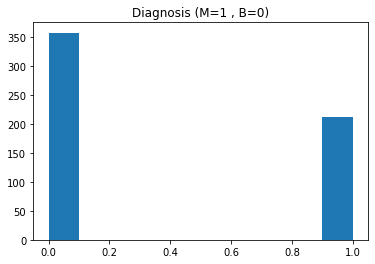

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [18]:
#Explore the data
bc_data.describe()
pyplot.hist(bc_data['diagnosis'])
pyplot.title('Diagnosis (M=1 , B=0)')
pyplot.show()

#Get the count of each label
bc_data.groupby(by='diagnosis').count()

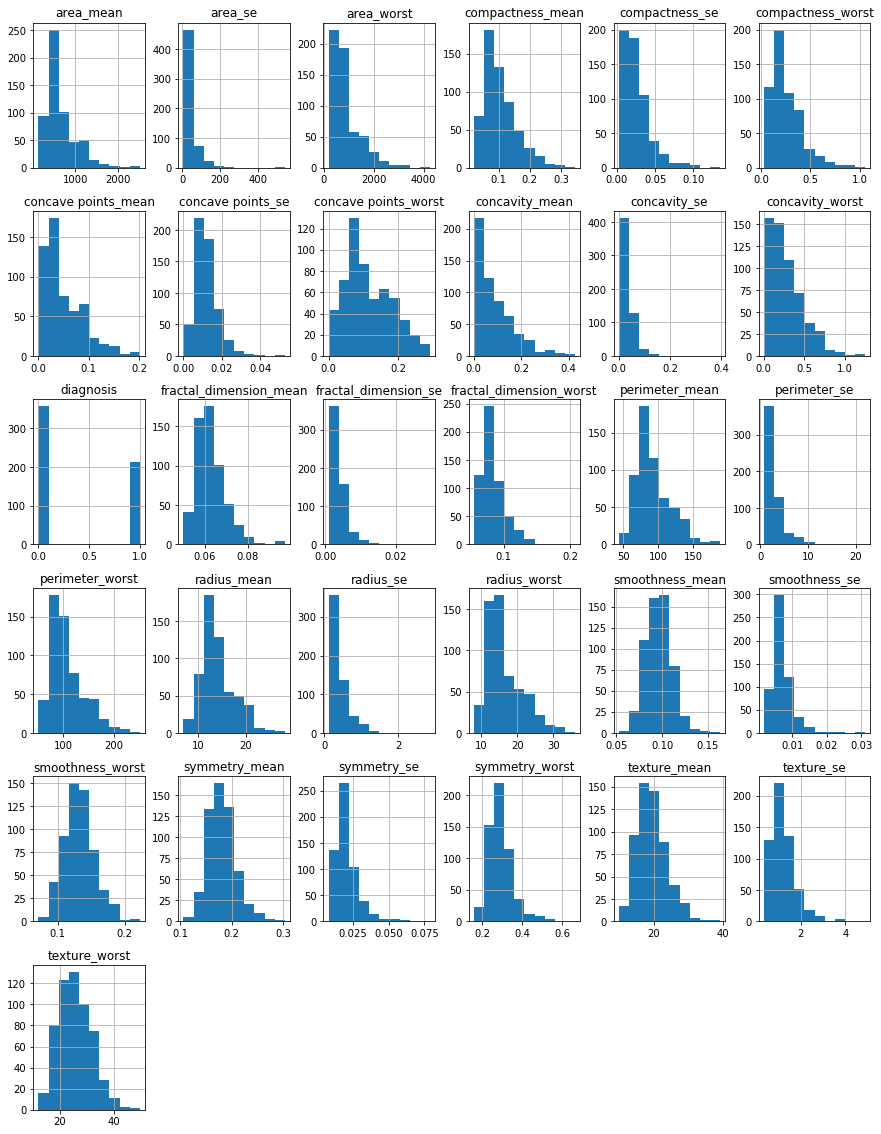

In [15]:
from matplotlib import pyplot as plt
bc_data.hist(figsize=(15,20))
plt.show()

In [40]:
corre=bc_data.corr(method='pearson')
corre['diagnosis'].sort_values(ascending=False, inplace=False)*100

(diagnosis                  100.000000
 concave points_worst        79.356602
 perimeter_worst             78.291414
 concave points_mean         77.661384
 radius_worst                77.645378
 perimeter_mean              74.263553
 area_worst                  73.382503
 radius_mean                 73.002851
 area_mean                   70.898384
 concavity_mean              69.635971
 concavity_worst             65.961021
 compactness_mean            59.653368
 compactness_worst           59.099824
 radius_se                   56.713382
 perimeter_se                55.614070
 area_se                     54.823594
 texture_worst               45.690282
 smoothness_worst            42.146486
 symmetry_worst              41.629431
 texture_mean                41.518530
 concave points_se           40.804233
 smoothness_mean             35.855997
 symmetry_mean               33.049855
 fractal_dimension_worst     32.387219
 compactness_se              29.299924
 concavity_se            

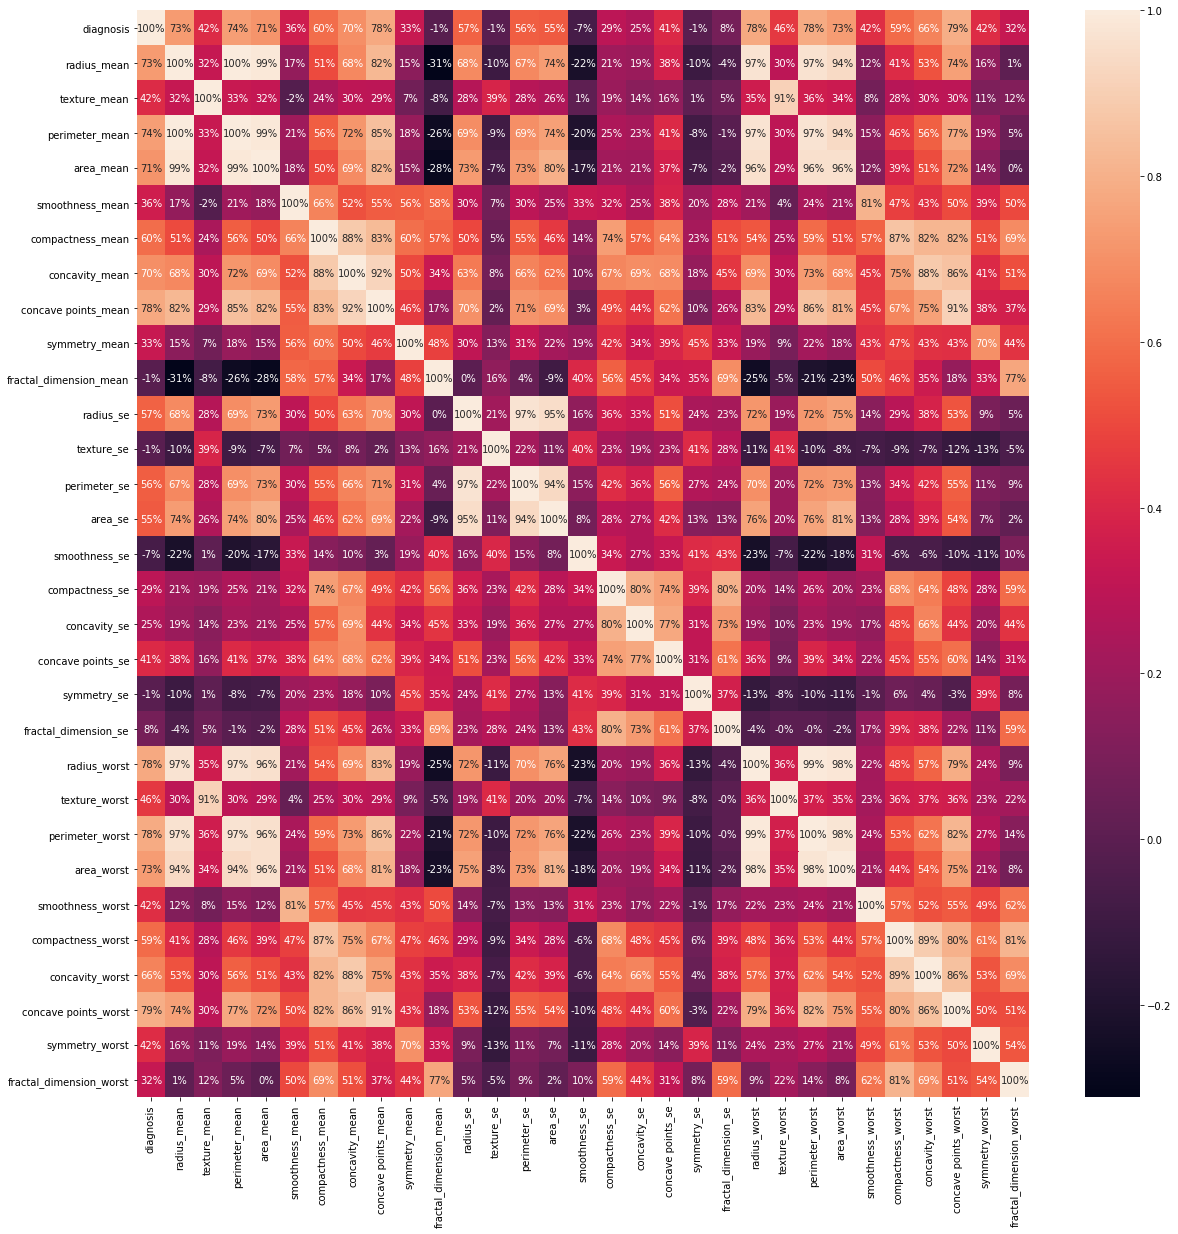

In [26]:
import seaborn as sns
pyplot.figure(figsize=(20,20))  
sns_plot=sns.heatmap(bc_data.corr(), annot=True, fmt='.0%')
fig = sns_plot.get_figure()
fig.savefig("correlation.png")

In [53]:
#Get Label and other features in separate dataframe
x_data=bc_data.iloc[:,1:31]
y_data=bc_data.iloc[:,0]

#Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_data = sc.fit_transform(x_data)
df=pd.DataFrame(x_data)

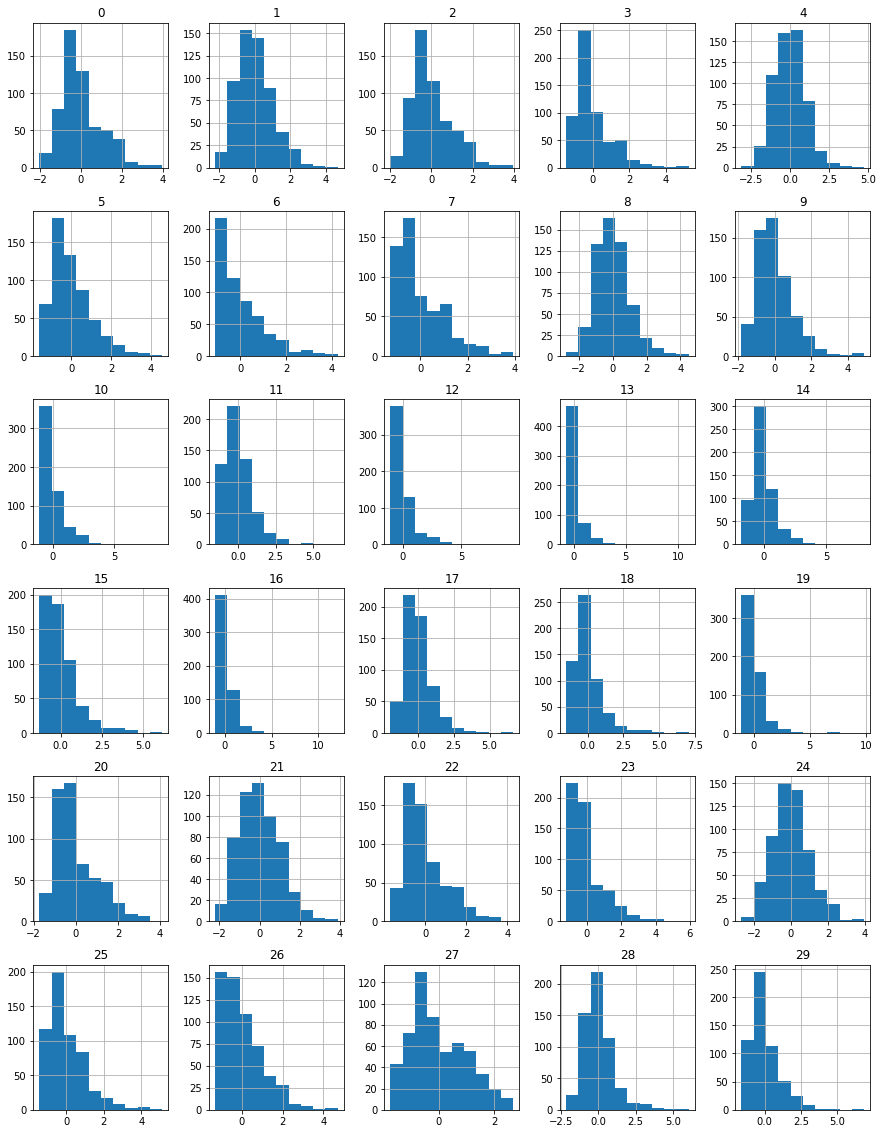

In [54]:
from matplotlib import pyplot as plt
df.hist(figsize=(15,20))
plt.show()

In [59]:
#Split the data to Train and Test sets
from sklearn.model_selection import train_test_split
, x_test, y_train,y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=100)

print ('Shape of the Training Set', x_train.shape)
print ('Shape of the Testing Set', x_test.shape)

Shape of the Training Set (455, 30)
Shape of the Testing Set (114, 30)


# KNN

*****Performance of KNN When K is 1 ********
-----Accuracy Score--------= 96.49

-----Confusion Matrix--------
[[64  3]
 [ 1 46]]

-----F1 Score--------= 95.83

-----precision Score--------= 93.88

-----recall Score--------= 97.87
Got the required score at K=1



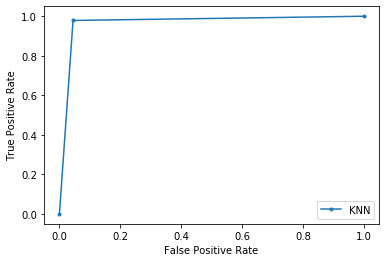

*********************** END OF K= 1 ***********************
*****Performance of KNN When K is 2 ********
-----Accuracy Score--------= 96.49

-----Confusion Matrix--------
[[65  4]
 [ 0 45]]

-----F1 Score--------= 95.74

-----precision Score--------= 91.84

-----recall Score--------= 100.0
Got the required score at K=2



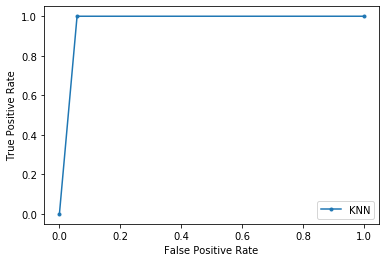

*********************** END OF K= 2 ***********************
*****Performance of KNN When K is 3 ********
-----Accuracy Score--------= 96.49

-----Confusion Matrix--------
[[64  3]
 [ 1 46]]

-----F1 Score--------= 95.83

-----precision Score--------= 93.88

-----recall Score--------= 97.87
Got the required score at K=3



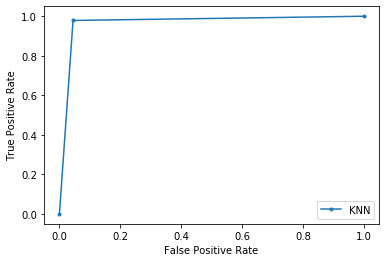

*********************** END OF K= 3 ***********************
*****Performance of KNN When K is 4 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[64  4]
 [ 1 45]]

-----F1 Score--------= 94.74

-----precision Score--------= 91.84

-----recall Score--------= 97.83
Got the required score at K=4



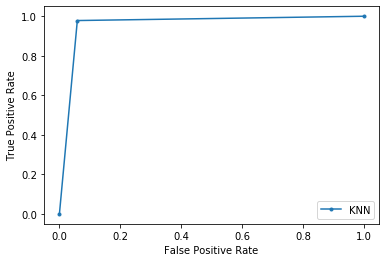

*********************** END OF K= 4 ***********************
*****Performance of KNN When K is 5 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[64  4]
 [ 1 45]]

-----F1 Score--------= 94.74

-----precision Score--------= 91.84

-----recall Score--------= 97.83
Got the required score at K=5



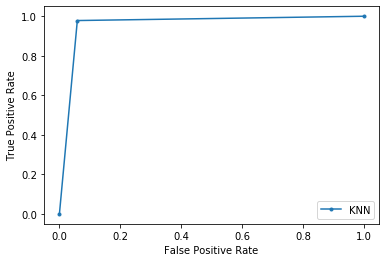

*********************** END OF K= 5 ***********************
*****Performance of KNN When K is 6 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[64  4]
 [ 1 45]]

-----F1 Score--------= 94.74

-----precision Score--------= 91.84

-----recall Score--------= 97.83
Got the required score at K=6



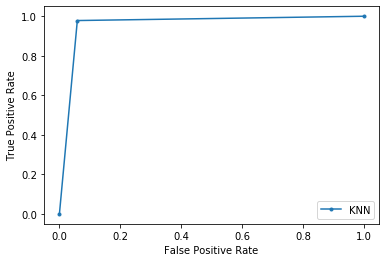

*********************** END OF K= 6 ***********************
*****Performance of KNN When K is 7 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[64  4]
 [ 1 45]]

-----F1 Score--------= 94.74

-----precision Score--------= 91.84

-----recall Score--------= 97.83
Got the required score at K=7



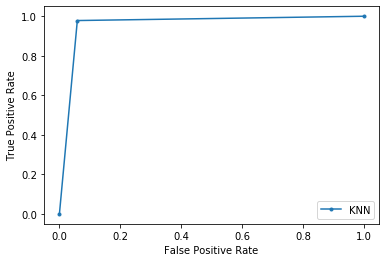

*********************** END OF K= 7 ***********************
*****Performance of KNN When K is 8 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[64  4]
 [ 1 45]]

-----F1 Score--------= 94.74

-----precision Score--------= 91.84

-----recall Score--------= 97.83
Got the required score at K=8



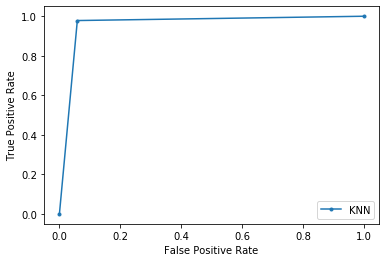

*********************** END OF K= 8 ***********************
*****Performance of KNN When K is 9 ********
-----Accuracy Score--------= 96.49

-----Confusion Matrix--------
[[64  3]
 [ 1 46]]

-----F1 Score--------= 95.83

-----precision Score--------= 93.88

-----recall Score--------= 97.87
Got the required score at K=9



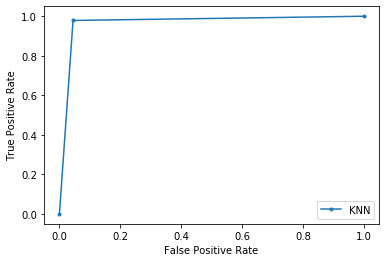

*********************** END OF K= 9 ***********************
*****Performance of KNN When K is 10 ********
-----Accuracy Score--------= 95.61

-----Confusion Matrix--------
[[65  5]
 [ 0 44]]

-----F1 Score--------= 94.62

-----precision Score--------= 89.8

-----recall Score--------= 100.0
Got the required score at K=10



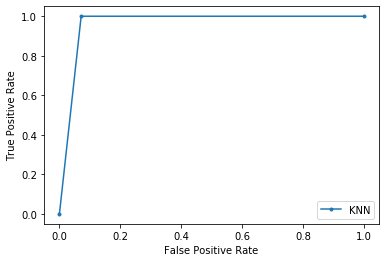

*********************** END OF K= 10 ***********************


In [63]:
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn_=knn.fit(x_train, y_train)
    prediction=knn.predict(x_test)
    
    print("*****Performance of KNN When K is %d ********" % i) 
    print("-----Accuracy Score--------=", round(metrics.accuracy_score(prediction,y_test)*100,2))
    print("")
    print("-----Confusion Matrix--------")
    print(metrics.confusion_matrix(prediction,y_test))
    print("")
    print("-----F1 Score--------=", round(metrics.f1_score(prediction,y_test)*100,2))
    print("")
    print("-----precision Score--------=", round(metrics.precision_score(prediction,y_test)*100,2))
    print("")
    print("-----recall Score--------=", round(metrics.recall_score(prediction,y_test)*100,2))
    
    acc_score=round(metrics.accuracy_score(prediction,y_test)*100,2)
    if acc_score>95:
         print("Got the required score at K=%d" % i)
        
         print("")
         # calculate scores
         from sklearn.metrics import roc_curve
         from sklearn.metrics import roc_auc_score

         knn_auc = roc_auc_score(prediction,y_test)

         # calculate roc curves
         knn_fpr, knn_tpr, _ = roc_curve(prediction,y_test)

         # plot the roc curve for the model
         pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')

         # axis labels
         pyplot.xlabel('False Positive Rate')
         pyplot.ylabel('True Positive Rate')

         # show the legend
         pyplot.legend()

         # show the plot
         pyplot.show()
         print("*********************** END OF K= %d ***********************" % i)

# LOGISTIC REGRESSION

Slope= [[ 0.36415866  0.45143985  0.3523356   0.41824229  0.20858511 -0.44267062
   0.77728685  0.88695459 -0.04526153 -0.40371802  1.22128709  0.08275152
   0.75901668  0.9248487   0.26497872 -0.77024028 -0.11989632  0.46218072
  -0.15557645 -0.74668576  0.90579063  1.05746587  0.85726627  0.84694396
   0.80604961 -0.00223036  0.79412021  0.95942999  0.82642756  0.46308374]]

Intercept= [-0.33697881]

-----Accuracy Score--------= 97.37

-----Confusion Matrix--------
[[65  3]
 [ 0 46]]



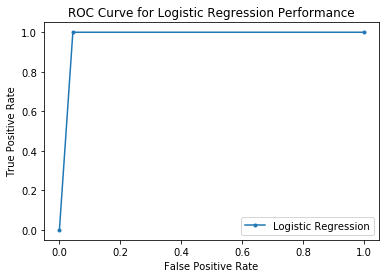

In [99]:
#Import required libraries
from sklearn.linear_model import LogisticRegression

#Apply Logistic regression
logr = LogisticRegression()
logr.fit(x_train, y_train)

print("Slope=", logr.coef_)
print("")
print("Intercept=", logr.intercept_)
print("")
log_pred=logr.predict(x_test)

prediction = pd.DataFrame({'Predicted':log_pred})

#Performance Caliculation

print("-----Accuracy Score--------=", round(metrics.accuracy_score(prediction,y_test)*100,2))
print("")
print("-----Confusion Matrix--------")
print(metrics.confusion_matrix(prediction,y_test))

print("")
# calculate scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

knn_auc = roc_auc_score(prediction,y_test)

# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(prediction,y_test)

# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='Logistic Regression')

# axis labels
pyplot.title('ROC Curve for Logistic Regression Performance')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()


# DecisionTrees

Accuracy Score 94.74

Confusion Matrix
[[64  5]
 [ 1 44]]



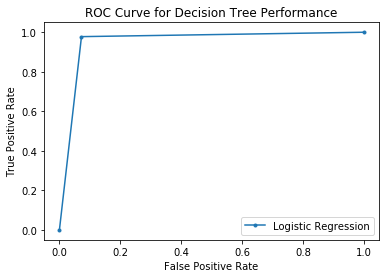

In [100]:
#Import required libraries and classes
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
DecTre=DecisionTreeClassifier()
#Apply Decision tree algorithm
DecTre.fit(x_train, y_train)
prediction=DecTre.predict(x_test)

#Performance caliculation
print("Accuracy Score", round(metrics.accuracy_score(prediction, y_test)*100,2))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(prediction, y_test))

print("")
# calculate scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

knn_auc = roc_auc_score(prediction,y_test)

# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(prediction,y_test)

# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='Logistic Regression')

# axis labels
pyplot.title('ROC Curve for Decision Tree Performance')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# pyplot.figure(figsize=(15,10))
# plot_tree(DecTre, filled=True)
# print(export_text(DecTre))

# Deep Learning (Artificial Neural Networks)

In [131]:
##Import Library and class requied for ANN apply
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ELU, LeakyReLU, PReLU
from keras.layers import Dropout

Using TensorFlow backend.


In [179]:
#Initialize the ANN
ann_classifier=Sequential()

#Adding an input layers and a hidden layer
ann_classifier.add(Dense(units = 51, init = 'he_uniform', activation='relu', input_dim=30))

#Adding hidden layer 1
ann_classifier.add(Dense(units = 30, init = 'he_uniform', activation='relu'))

#Adding hidden layer 2
ann_classifier.add(Dense(units = 21, init = 'he_uniform', activation='relu'))

#Adding hidden layer 3
ann_classifier.add(Dense(units = 11, init = 'he_uniform', activation='relu'))

#Adding an output layer
ann_classifier.add(Dense(units = 1, init = 'glorot_uniform', activation='sigmoid'))

#Compiling the ANN
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the ANN to Train and Test data
model_fit=ann_classifier.fit(x_train, y_train, validation_split=0.30, batch_size=10, nb_epoch=201)

c:\users\yanamadalavenkatesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=51, activation="relu", input_dim=30, kernel_initializer="he_uniform")`
  """
c:\users\yanamadalavenkatesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=30, activation="relu", kernel_initializer="he_uniform")`
  
c:\users\yanamadalavenkatesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=21, activation="relu", kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
c:\users\yanamadalavenkatesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=11, activation="re

Train on 318 samples, validate on 137 samples
Epoch 1/201
318/318 [==============================] - 0s 1ms/step - loss: 8.4874 - accuracy: 0.5629 - val_loss: 0.7259 - val_accuracy: 0.8102
Epoch 2/201
318/318 [==============================] - 0s 369us/step - loss: 0.5501 - accuracy: 0.8239 - val_loss: 0.4986 - val_accuracy: 0.8540
Epoch 3/201
318/318 [==============================] - 0s 392us/step - loss: 0.3442 - accuracy: 0.8774 - val_loss: 0.3576 - val_accuracy: 0.8905
Epoch 4/201
318/318 [==============================] - 0s 317us/step - loss: 0.2790 - accuracy: 0.8774 - val_loss: 0.2146 - val_accuracy: 0.8978
Epoch 5/201
318/318 [==============================] - 0s 303us/step - loss: 0.2824 - accuracy: 0.8868 - val_loss: 0.2711 - val_accuracy: 0.8832
Epoch 6/201
318/318 [==============================] - 0s 312us/step - loss: 0.2467 - accuracy: 0.9151 - val_loss: 0.2088 - val_accuracy: 0.9051
Epoch 7/201
318/318 [==============================] - 0s 309us/step - loss: 0.2357 - 

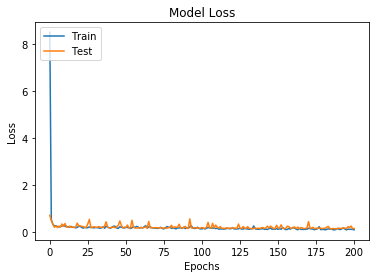

In [180]:
#Visualization of Model Loss value with respct to Epoch for Train and Val data
pyplot.plot(model_fit.history['loss'])
pyplot.plot(model_fit.history['val_loss'])
pyplot.title('Model Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend(['Train', 'Test'], loc='upper left')
pyplot.show()

In [181]:
##Predict the test data
y_predict=ann_classifier.predict(x_test)
y_predict=(y_predict>0.5)

In [182]:
#Validate the predicted values with respect to actual values
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
#y_predict=pd.DataFrame(y_predict)
print('Confusion Matrix is')
print(cm)
print("")
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_predict, y_test)
print('Accuracy Score is:', acc_score)

Confusion Matrix is
[[61  4]
 [ 0 49]]

Accuracy Score is: 0.9649122807017544


# Support Vector Machines

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
SV_classifier = SVC(kernel='linear')
SV_classifier.fit(x_train, y_train)
prediction = SV_classifier.predict(x_test)    

Accuracy Score = 96.49

Confusion Matrix is
[[64  3]
 [ 1 46]]

F1 Score =  95.83

precision Score =  93.88

recall Score =  97.87



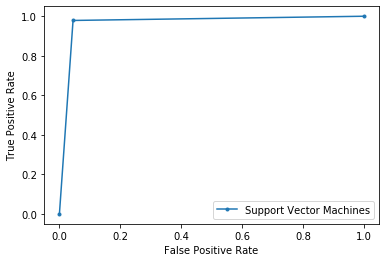

In [75]:
print("Accuracy Score =", round(metrics.accuracy_score(prediction,y_test)*100,2))
print("")
print("Confusion Matrix is")
print(metrics.confusion_matrix(prediction,y_test))
print("")
print("F1 Score = ", round(metrics.f1_score(prediction,y_test)*100,2))
print("")
print("precision Score = ", round(metrics.precision_score(prediction,y_test)*100,2))
print("")
print("recall Score = ", round(metrics.recall_score(prediction,y_test)*100,2))
    
     
print("")
# calculate scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
svm_auc = roc_auc_score(prediction,y_test)

# calculate roc curves
svm_fpr, svm_tpr, _ = roc_curve(prediction,y_test)

# plot the roc curve for the model
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# xgboost

In [76]:
# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(x_train, y_train)
#Predict the test results
prediction = xgb.predict(x_test)

In [77]:
#Predict the test results
prediction = xgb.predict(x_test)

Accuracy Score = 97.37

Confusion Matrix is
[[64  2]
 [ 1 47]]

F1 Score =  96.91

precision Score =  95.92

recall Score =  97.92



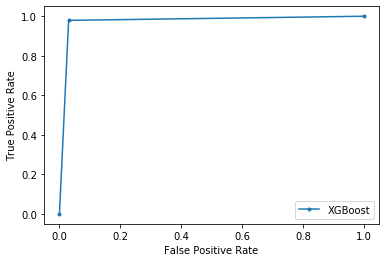

In [79]:
print("Accuracy Score =", round(metrics.accuracy_score(prediction,y_test)*100,2))
print("")
print("Confusion Matrix is")
print(metrics.confusion_matrix(prediction,y_test))
print("")
print("F1 Score = ", round(metrics.f1_score(prediction,y_test)*100,2))
print("")
print("precision Score = ", round(metrics.precision_score(prediction,y_test)*100,2))
print("")
print("recall Score = ", round(metrics.recall_score(prediction,y_test)*100,2))
    
     
print("")
# calculate scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
xgb_auc = roc_auc_score(prediction,y_test)

# calculate roc curves
xgb_fpr, xgb_tpr, _ = roc_curve(prediction,y_test)

# plot the roc curve for the model
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Accuracy Scores of KNN, LOGISTIC, DECISION TREES, SVM, XGBOOST and ANN

In [140]:
#Logistic regression;
log_train_accu=metrics.accuracy_score(y_train, logr.predict(x_train))
log_test_accu=metrics.accuracy_score(y_test, logr.predict(x_test))

#KNN;
knn_train_accu=metrics.accuracy_score(y_train, knn.predict(x_train))
knn_test_accu=metrics.accuracy_score(y_test, knn.predict(x_test))

#Decision Trees;
dct_train_accu=metrics.accuracy_score(y_train, DecTre.predict(x_train))
dct_test_accu=metrics.accuracy_score(y_test, DecTre.predict(x_test))

#SVM;
svm_train_accu=metrics.accuracy_score(y_train, SV_classifier.predict(x_train))
svm_test_accu=metrics.accuracy_score(y_test, SV_classifier.predict(x_test))

#XGBOOST;
xgb_train_accu=metrics.accuracy_score(y_train, xgb.predict(x_train))
xgb_test_accu=metrics.accuracy_score(y_test, xgb.predict(x_test))

In [142]:
##Create a dataframe with accuracy scores
acc_data = [['Logistic Regression', log_train_accu, log_test_accu], ['K-Nearest Neighbors', knn_train_accu, knn_test_accu], ['Decision Trees', dct_train_accu, dct_test_accu]
            ,['Support Vector Machines', svm_train_accu, svm_test_accu],['XGBoost', xgb_train_accu, xgb_test_accu]] 

df = pd.DataFrame(acc_data, columns = ['ML Model Name', 'Training Accuracy', 'Testing Accuracy']) 

df['Training Accuracy']=round(df['Training Accuracy']*100,2)
df['Testing Accuracy']=round(df['Testing Accuracy']*100,2)
df

,ML Model Name,Training Accuracy,Testing Accuracy
0,Logistic Regression,99.34,97.37
1,K-Nearest Neighbors,97.14,95.61
2,Decision Trees,100.00,94.74
3,Support Vector Machines,99.12,96.49
4,XGBoost,100.00,97.37


<Figure size 7200x7200 with 0 Axes>

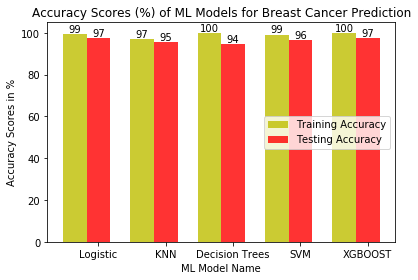

<Figure size 432x288 with 0 Axes>

In [138]:
# create plot
plt.figure(figsize=(100,100))

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df['Training Accuracy'], bar_width,
alpha=opacity,
color='y',
label='Training Accuracy')

rects2 = plt.bar(index + bar_width, df['Testing Accuracy'], bar_width,
alpha=opacity,
color='r',
label='Testing Accuracy')

plt.xlabel('ML Model Name')
plt.ylabel('Accuracy Scores in %')
plt.title('Accuracy Scores (%) of ML Models for Breast Cancer Prediction')
plt.xticks(index + bar_width, ('Logistic', 'KNN', 'Decision Trees', 'SVM', 'XGBOOST'))
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(loc='center right')
# plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Dimentionality reduction

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#Encoding the label of class--Categorical to Numeric
from sklearn.preprocessing import LabelEncoder
#For performance metrics
from sklearn import metrics

%matplotlib inline

In [2]:
bc_data=pd.read_csv('C:\\Users\\yanamadalavenkatesh\\Desktop\\Outoff\\Amity\\Project\\breast-cancer-wisconsin-data\\data.csv')

In [3]:
#Map the caharacter values to numeric values
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M':1,'B':0})

In [4]:
x_data=bc_data.iloc[:,2:31]
y_data=bc_data.iloc[:,1]

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
bc_scale = sc.fit_transform(x_data)

from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(bc_scale)
x_pca=pca.transform(bc_scale)

In [6]:

x_pca.shape

(569, 5)

c:\users\yanamadalavenkatesh\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


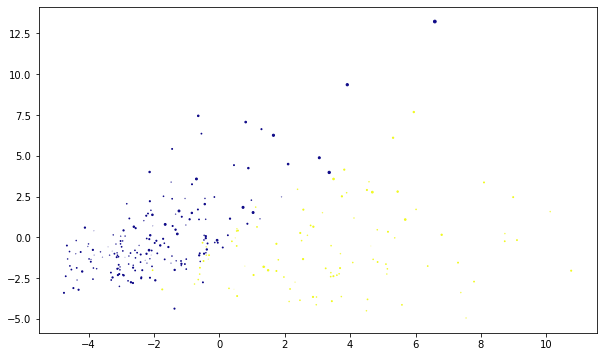

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,4], c=y_data, cmap='plasma')

In [8]:
#Split the data to Train and Test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x_pca, y_data, test_size=0.2, random_state=100)

In [9]:
# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(x_train, y_train)
#Predict the test results
prediction = xgb.predict(x_test)

In [10]:
print("Accuracy Score", round(metrics.accuracy_score(prediction, y_test)*100,2))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(prediction, y_test))

Accuracy Score 98.25

Confusion Matrix
[[65  2]
 [ 0 47]]


# For Deployment

Create Pickle File

In [11]:
import pickle
#Create model as pickle file
pickle_out=open("xgb.pkl", 'wb')
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [12]:
# Loading model to compare the results
model = pickle.load(open('xgb.pkl','rb'))

print(model.predict(x_test[1:2]))

[0]


Create Flask APP

In [ ]:
from flask import Flask, request
import pickle
import numpy as np

app=Flask(__name__)
pickle_in=open('xgb.pkl', 'rb')
xgb=pickle.load(pickle_in)

@app.route('/')
def welcome():
    return "Welcome All"

@app.route('/predict')
def test():
    var1=request.args.get('var1')
    var2=request.args.get('var2')
    var3=request.args.get('var3')
    var4=request.args.get('var4')
    var5=request.args.get('var5')
    ar=np.array([[var1, var2, var3, var4,var5]])
    prediction=xgb.predict(ar)
    return "Predicted Value is " + str(prediction)

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


UI Using Falsgger

In [13]:
import flasgger
from flasgger import Swagger
from flask import Flask, request
import pickle
import numpy as np

In [14]:
app=Flask(__name__)
Swagger(app)
pickle_in=open("xgb.pkl", "rb")
xgb=pickle.load(pickle_in)

In [ ]:
@app.route('/')
def welcome():
    return "Welcome All"

@app.route('/predict', methods=["GET"])
def prediction():
       
    """Lets Authenticate
    just testing.
    ---
    parameters:
      - name: var1
        in: query
        type: number
        required: true
      - name: var2
        in: query
        type: number
        required: true
      - name: var3
        in: query
        type: number
        required: true     
      - name: var4
        in: query
        type: number
        required: true
      - name: var5
        in: query
        type: number
        required: true
    responses:
      200:
         description: the output values    

    """
    var1=request.args.get('var1')
    var2=request.args.get('var2')
    var3=request.args.get('var3')
    var4=request.args.get('var4')
    var5=request.args.get('var5')
    ar=np.array([[var1, var2, var3, var4,var5]])
    prediction=xgb.predict(ar)
    return "The tumor is predicted as " + str(prediction)

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/May/2020 19:13:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2020 19:13:12] "GET /apidocs HTTP/1.1" 308 -
127.0.0.1 - - [24/May/2020 19:13:12] "GET /apidocs/ HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2020 19:13:13] "GET /apispec_1.json HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2020 19:13:42] "GET /predict?var1=1&var2=1&var3=1&var4=1&var5=1 HTTP/1.1" 200 -
